### Oxfort Pet Dataset

https://www.robots.ox.ac.uk/~vgg/data/pets/



### README

Yellow - Foreground

Blue - Background

Red - Not Classified

---
ID : 1-37 class ids

SPECIES : 1 - Cat, 2 - Dog

BREED ID : 1-25 Cat, 1-12 Dog

---
이름의 첫 알파벳이 대문자면 고양이, 소문자면 강아지이다.

---

[folder]

- images : pet image file (.jpg)
- annotations
    - trimaps : segmented image (정답)
    - xmls : xml files

In [1]:
import os
from glob import glob

In [6]:
image_dir = os.getcwd() + '\\images'
bbox_dir = os.getcwd() + '\\annotations\\xmls'      # boundary box
seg_dir = os.getcwd() + '\\annotations\\trimaps'    # segmentation

In [15]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
bbox_files = [fname for fname in os.listdir(bbox_dir)]
seg_files = [fname for fname in os.listdir(seg_dir) if fname[:2] != '._']

len(image_files), len(bbox_files), len(seg_files)

(7390, 3686, 7390)

In [16]:
image_files[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [17]:
bbox_files[:10]

['Abyssinian_1.xml',
 'Abyssinian_10.xml',
 'Abyssinian_100.xml',
 'Abyssinian_101.xml',
 'Abyssinian_102.xml',
 'Abyssinian_103.xml',
 'Abyssinian_105.xml',
 'Abyssinian_106.xml',
 'Abyssinian_107.xml',
 'Abyssinian_108.xml']

In [18]:
seg_files[:10]

['Abyssinian_1.png',
 'Abyssinian_10.png',
 'Abyssinian_100.png',
 'Abyssinian_101.png',
 'Abyssinian_102.png',
 'Abyssinian_103.png',
 'Abyssinian_104.png',
 'Abyssinian_105.png',
 'Abyssinian_106.png',
 'Abyssinian_107.png']

### bbox 출력

In [19]:
import numpy as np
from PIL import Image
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

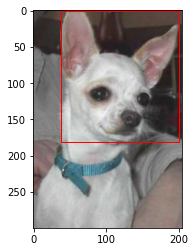

In [61]:
rnd_idx = np.random.randint(1, len(image_files))
fname = image_files[rnd_idx]
fpath = os.path.join(image_dir, fname)
image = Image.open(fpath)
image = np.array(image)

bbox_name = os.path.splitext(fname)[0] + '.xml'
bbox_path = os.path.join(bbox_dir, bbox_name)
tree = et.parse(bbox_path)

width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

#     (xy)---- width -----+
#      |                  |
#    height               |
#      |                  |
#      +------------------+
rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')

plt.figure(facecolor='w')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

### seg 출력

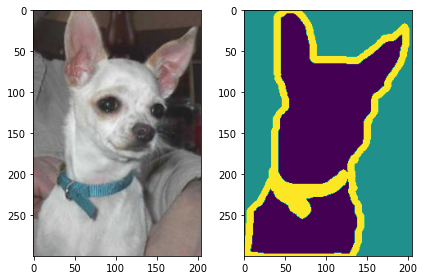

In [62]:
sname = os.path.splitext(fname)[0] + '.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)
seg = np.array(seg)

plt.figure(facecolor='w')
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(seg)
plt.tight_layout()
plt.show()